# ***Engr.Muhammad Javed***

# 01. Convolution Operation Application on MNIST



## 1. Theory: The Convolution Operation

Convolution is the core building block of Convolutional Neural Networks (CNNs). In the context of image processing, it involves sliding a small matrix (called a **filter** or **kernel**) over an input image (or feature map) and computing the dot product at each position.



### Key Concepts:

- **Input Image**: A grid of pixel values (e.g., 28x28 for MNIST).

- **Filter/Kernel**: A smaller grid (e.g., 3x3) containing learnable weights or predefined values.

- **Feature Map**: The output of the convolution, representing features detected by the filter (like edges).



$$ Output(i, j) = \sum_{m} \sum_{n} Input(i+m, j+n) \times Kernel(m, n) $$

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/resour

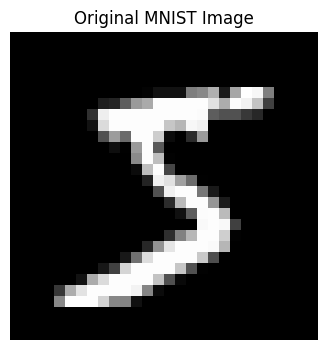

Image Shape: (28, 28)


In [1]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist



# Load the MNIST dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



# Select one image for demonstration (e.g., the first image)

original_image = train_images[0]



plt.figure(figsize=(4, 4))

plt.imshow(original_image, cmap='gray')

plt.title("Original MNIST Image")

plt.axis('off')

plt.show()

print("Image Shape:", original_image.shape)

## 2. Manual Implementation of Convolution

Let's define a function to perform 2D convolution manually to understand what happens under the hood.

In [3]:
def convolve2d(image, kernel):

    kernel_height, kernel_width = kernel.shape

    image_height, image_width = image.shape

    

    # Calculate output dimensions (assuming valid padding, stride=1)

    output_height = image_height - kernel_height + 1

    output_width = image_width - kernel_width + 1

    

    # Initialize output feature map

    feature_map = np.zeros((output_height, output_width))

    

    # Perform convolution

    for i in range(output_height):

        for j in range(output_width):

            # Extract the region of interest (ROI) from the image

            roi = image[i:i+kernel_height, j:j+kernel_width]

            # Element-wise multiplication and sum

            feature_map[i, j] = np.sum(roi * kernel)

            

    return feature_map

## 3. Applying Filters (Kernels)

We will apply different kernels to detecting specific features like **vertical edges** and **horizontal edges**.

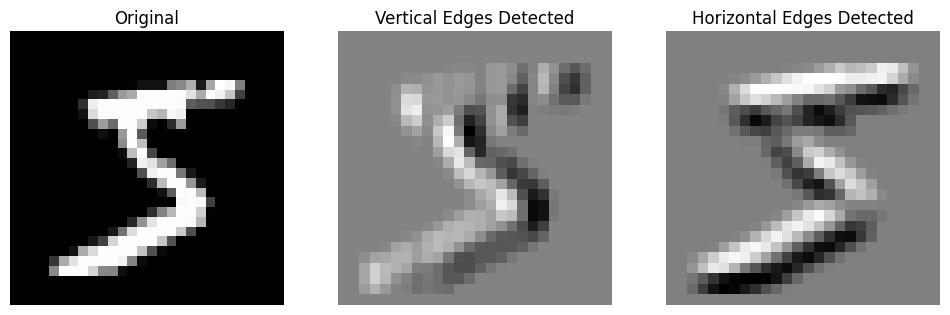

In [4]:
# Define a Vertical Edge Detection Filter

vertical_edge_filter = np.array([

    [-1, 0, 1],

    [-1, 0, 1],

    [-1, 0, 1]

])

# Define a Horizontal Edge Detection Filter

horizontal_edge_filter = np.array([

    [-1, -1, -1],

    [ 0,  0,  0],

    [ 1,  1,  1]

])



# Apply convolution

vertical_map = convolve2d(original_image, vertical_edge_filter)

horizontal_map = convolve2d(original_image, horizontal_edge_filter)



# Plotting

plt.figure(figsize=(12, 4))



plt.subplot(1, 3, 1)

plt.imshow(original_image, cmap='gray')

plt.title("Original")

plt.axis('off')



plt.subplot(1, 3, 2)

plt.imshow(vertical_map, cmap='gray')

plt.title("Vertical Edges Detected")

plt.axis('off')



plt.subplot(1, 3, 3)

plt.imshow(horizontal_map, cmap='gray')

plt.title("Horizontal Edges Detected")

plt.axis('off')



plt.show()

### Observation

Notice how the **Vertical Edge Filter** highlights the vertical strokes of the digit (e.g., the sides of a '5' or '0'), while the **Horizontal Edge Filter** highlights the top and bottom strokes.



In a CNN, these filters are **learned** automatically during training rather than being hardcoded.